# Exercise 7 : Waveform inversion

With waveform inversion we try to find the velocity model for which the modeled data optimally fits the observed data in a least-squares sense. Mathematically, we try to solve the following optimization problem:

where  is the modeling operator and  is the observed data.

Contents:
- Camambert model
- Modeling
- Optimization
- Inversion

To illustrate some key properties of the waveform inversion problem, we are going to conduct some experiments on the famous 'Camambert' model.

# Camambert model:

The Camambert model consists of a circular perturbation,  , superimposed on a homogeneous medium,  , with velocity 2500 m/s.

In [1]:
using JUDI.TimeModeling, JUDI.SLIM_optim, PyPlot, SeisIO

In [2]:
# Velocity model

# number of gridpoints
n = (101, 101)

# Grid spacing
d = (10.0, 10.0)

# Origin
o = (0., 0.)

x = zeros(n)
z = zeros(n)

for i in 0:100
    x[i+1, :] = i*10
    z[:, i+1] = i*10
end

# 
vp = 1.5 * ones(Float32, n)
vp[find(sqrt.((x-500).^2 +(z-500).^2) .>250)]=2.5
m = 1./vp.^2
#
v0 = 1.5 * ones(Float32, n)
m0 = 1./v0.^2

101×101 Array{Float64,2}:
 0.444444  0.444444  0.444444  0.444444  …  0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444  …  0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444  …  0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 0.444444  0.444444  0.444444  0.444444     0.444444  0.444444  0.444444
 ⋮                       

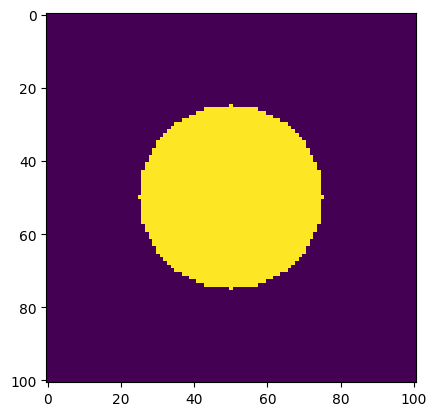

PyObject <matplotlib.image.AxesImage object at 0x7f56dbf57320>

In [3]:
imshow(m)

In [4]:
# Set up model structure w/ squared slowness
model0 = Model(n, d, o, m0)
model = Model(n, d, o, m)

JUDI.TimeModeling.Model((101, 101), (10.0, 10.0), (0.0, 0.0), 40, [0.16 0.16 … 0.16 0.16; 0.16 0.16 … 0.16 0.16; … ; 0.16 0.16 … 0.16 0.16; 0.16 0.16 … 0.16 0.16], 1)

# Source geometry

In [5]:
# Sources
nsrc = 10
xsrc = convertToCell(linspace(10, 990., nsrc))
ysrc = convertToCell(linspace(0., 0., nsrc))
zsrc = convertToCell(linspace(10., 10., nsrc))
# source sampling and number of time steps
timeS = 1000.
dtS = 2.

# Set up source structure
srcGeometry = Geometry(xsrc,ysrc,zsrc; dt=dtS, t=timeS)

JUDI.TimeModeling.GeometryIC(Any[10.0, 118.889, 227.778, 336.667, 445.556, 554.444, 663.333, 772.222, 881.111, 990.0], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0], Any[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Any[501, 501, 501, 501, 501, 501, 501, 501, 501, 501], Any[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0])

# Receiver geometry

In [6]:
# Receievers reflection
nrec = 50
xrec = linspace(10, 990., nrec)
yrec = 0.
zrec = linspace(10., 10., nrec)
# source sampling and number of time steps
timeR = 1000.
dtR = 2.

# Set up receiver structure
recGeometry_reflection = Geometry(xrec,yrec,zrec;dt=dtR,t=timeR, nsrc=nsrc)

# Receievers transmission
nrec = 50
xrec = linspace(10, 990., nrec)
yrec = 0.
zrec = linspace(990., 990., nrec)
# source sampling and number of time steps
timeR = 1000.
dtR = 2.

# Set up receiver structure
recGeometry_transmission = Geometry(xrec,yrec,zrec;dt=dtR,t=timeR, nsrc=nsrc)

JUDI.TimeModeling.GeometryIC(Any[10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0], Any[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Any[501, 501, 501, 501, 501, 501, 501, 501, 501, 501], Any[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0])

# Optimization

lbfgs (minConf_PQN here) can be used to solve optimization problems of the form:

$\min_{\mathbf{m}}\quad \phi(\mathbf{m})$

The method needs a function that calculates the misfit and gradient. The gradient of the LS misfit:

$\phi(\mathbf{m}) = \frac{1}{2}|F(\mathbf{m}) {-} \mathbf{d}|_2^2$

is given by

$\nabla\phi(\mathbf{m}) = J(\mathbf{m})^*(F(\mathbf{m}) {-} \mathbf{d})$

where $J(\mathbf{m})$ is the Jacobian matrix of $F$ and $^*# denotes the complex-conjugate-transpose (' in Julia). The Jacobian is provided by the modeling operator: `J = judiJacobian(F, q)`

Write a julia function misfit(m) that returns the value of the misfit and the gradient for the given model `m`.
minConf_SQP that function as an input


# Inversion

In the following experiments we will vary acquisition setup to emulatate a reflection and a transmission experiment:

Reflection setup: `reflection_data.segy`.
Transmission setup:`transmission_data.segy`.

- define the function-handle as described above.
- define an initial model m0 by converting v0 to the proper units.
- use lbfgs| for a small amount of iterations (10, say).

Compare the results of both experiments in terms of:

- reconstruction
- data-fit


In order to obtain nice conergence use the following bound constraint

# Bound projection
ProjBound(x) = boundproject(x, maximum(m), .9*minimum(m))

# Setup

In [7]:
# To setup the operator in for example the reflection case

# setup wavelet
f0 = 0.01  # 5 Hz wavelet
wavelet = ricker_wavelet(timeS, dtS, f0)
q = judiVector(srcGeometry, wavelet)


# Set up info structure for linear operators
ntComp = get_computational_nt(srcGeometry, recGeometry_reflection, model)
info = Info(prod(n), nsrc, ntComp)

JUDI.TimeModeling.Info(10201, 10, Any[595, 595, 595, 595, 595, 595, 595, 595, 595, 595])

In [8]:

F_r = judiModeling(info, model, srcGeometry, recGeometry_reflection)

F_t = judiModeling(info, model, srcGeometry, recGeometry_transmission)

JUDI.TimeModeling.judiPDEfull{Float32,Float32}("Proj*F*Proj'", 250500, 5010, JUDI.TimeModeling.Info(10201, 10, Any[595, 595, 595, 595, 595, 595, 595, 595, 595, 595]), JUDI.TimeModeling.Model((101, 101), (10.0, 10.0), (0.0, 0.0), 40, [0.16 0.16 … 0.16 0.16; 0.16 0.16 … 0.16 0.16; … ; 0.16 0.16 … 0.16 0.16; 0.16 0.16 … 0.16 0.16], 1), JUDI.TimeModeling.GeometryIC(Any[10.0, 118.889, 227.778, 336.667, 445.556, 554.444, 663.333, 772.222, 881.111, 990.0], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0], Any[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Any[501, 501, 501, 501, 501, 501, 501, 501, 501, 501], Any[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]), JUDI.TimeModeling.GeometryIC(Any[10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0], Any[0.0, 0.0, 0.0, 0.0, 0.

In [9]:
d_trans = F_t * q

JUDI.TimeModeling.judiVector{Float32}("Seismic data vector", 250500, 1, 10, JUDI.TimeModeling.GeometryIC(Any[10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0, 10.0:20.0:990.0], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0, 990.0:0.0:990.0], Any[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Any[501, 501, 501, 501, 501, 501, 501, 501, 501, 501], Any[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]), Array[Float32[0.0 -0.0 … -0.0 0.0; 0.0 -0.0 … -0.0 0.0; … ; -0.0530398 -0.105493 … 0.0912436 0.0912222; 0.0 0.0 … 0.0 0.0], Float32[0.0 -0.0 … 0.0 -0.0; 0.0 -0.0 … 0.0 -0.0; … ; -0.163198 -0.1326 … 0.0793813 0.0707329; 0.0 0.0 … 0.0 0.0], Float32[-0.0 -0.0 … -0.0 0.0; -0.0 -0.0 … -0.0 0.0; … ;

In [10]:
function f(x)
    
    # Update model
    model0.m = convert(Array{Float32, 2}, reshape(x, model0.n))
    F0_t = judiModeling(info, model0, srcGeometry, recGeometry_transmission)
    J = judiJacobian(F0_t, q)
    
    # Synthetic data
    d_syn = F0_t*q
    
    # residual
    
    residual = d_syn - d_trans
    
    # Misfit
    
    f = .5*norm(residual)^2
    
    # gradient
    
    grad = J'*residual
    
    return f, vec(grad)
end
    

f (generic function with 1 method)

In [ ]:
# invert
options = pqn_options(verbose=3, maxIter=10, corrections=10)
# Bound projection
ProjBound(x) = boundproject(x, maximum(m), .9*minimum(m))
x, fsave, funEvals= minConf_PQN(f, vec(m0), ProjBound, options)